## Importing required packages 

In [3]:
import missingno, fancyimpute
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split

C:\Users\pranavi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### import os
os.getcwd()

### Reading the data

In [83]:
data=pd.read_csv("C:/Users/pranavi/Desktop/StockData/FB.csv")

### Data Frame 

In [84]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,26-02-2018,184.580002,185.660004,183.220001,184.929993,184.929993,17599700
1,27-02-2018,184.449997,184.699997,181.460007,181.460007,181.460007,15849800
2,28-02-2018,182.300003,182.880005,178.139999,178.320007,178.320007,18783000
3,01-03-2018,179.009995,180.119995,174.410004,175.940002,175.940002,23201600


### Shape of data

In [85]:
data.shape

(252, 7)

### Datatypes in data

In [86]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Missing valuse Analysis

### Count of  missing values in each variable 

In [121]:
data.isna().sum()

High           0
Low            0
Adj Close      0
Volume         0
Profit/Loss    0
dtype: int64

### Matrix plot of Missing values

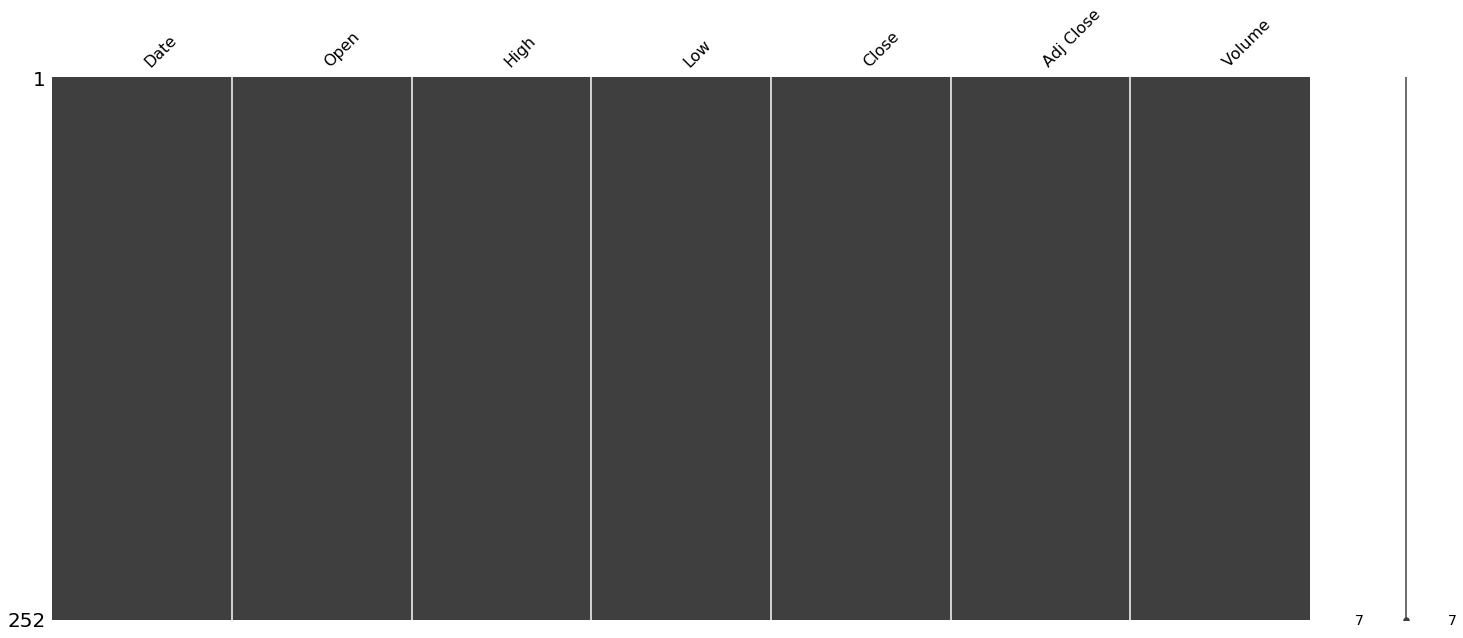

In [87]:
missingno.matrix(data)

### from the count and matrix plot it is clear that there are no missing value 

## Univariate Analysis

### In univariate analysis we plot graphs for each variable and check the spread of data points as the data considered is completely numerical so we go with boxplot to understand the particular variables in the consider dataset  

{'whiskers': [<matplotlib.lines.Line2D at 0x2c6f5e4a780>,
 'caps': [<matplotlib.lines.Line2D at 0x2c6f5e55080>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c6f5e4a630>],
 'medians': [<matplotlib.lines.Line2D at 0x2c6f5e558d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c6f5e55cf8>],
 'means': []}

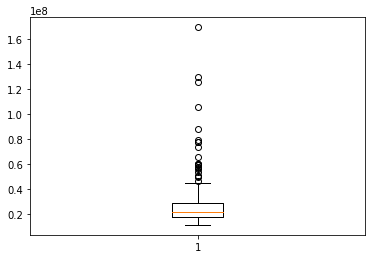

In [88]:
plt.boxplot(data['Volume'])

### From the boxplot of Volume we see that there are many higher valuse which as shown as outliers and first and second quartiles the data points are very closely spread,more than 50% ofthe data is dense there are few high values which are considered as outliers  

{'whiskers': [<matplotlib.lines.Line2D at 0x2c6f606cb00>,
 'caps': [<matplotlib.lines.Line2D at 0x2c6f6075400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c6f606c9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c6f6075c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c6f607f0b8>],
 'means': []}

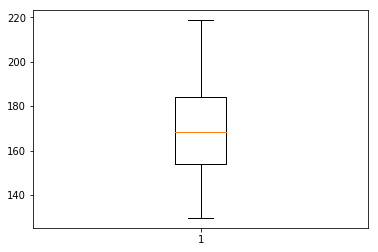

In [114]:
plt.boxplot(data['High'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c6f5eceac8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c6f5ed73c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c6f5ece9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c6f5ed7c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c6f5ede080>],
 'means': []}

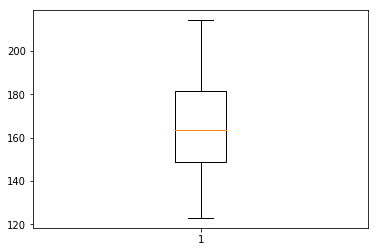

In [90]:
plt.boxplot(data['Low'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c6f5f1cb38>,
 'caps': [<matplotlib.lines.Line2D at 0x2c6f5f24438>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c6f5f1c9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c6f5f24c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c6f5f2d0f0>],
 'means': []}

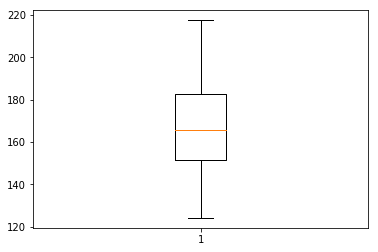

In [91]:
plt.boxplot(data["Adj Close" ])

### The variables High Low Adj close have similar plots as they are dependent on each other 

{'whiskers': [<matplotlib.lines.Line2D at 0x2c6f5f5d470>,
 'caps': [<matplotlib.lines.Line2D at 0x2c6f5f5dd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c6f5f5d320>],
 'medians': [<matplotlib.lines.Line2D at 0x2c6f5f665c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c6f5f669e8>],
 'means': []}

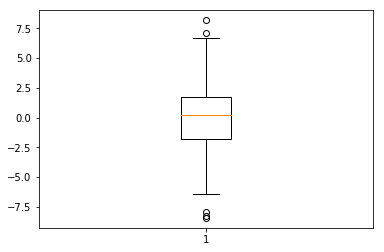

In [96]:
plt.boxplot(data["Profit/Loss"])

### 50% of the values lie btwn -2 and 2 lows and high values are very less in number and loosly spread few high and low values are taken out as outliers 

### Descerbing the variables 

In [126]:
data.describe()

,High,Low,Adj Close,Volume,Profit/Loss
count,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,169.329008,165.087778,167.244841,2.693082e+07,0.095158
std,20.031558,20.641553,20.505810,1.913957e+07,2.754037
min,129.740005,123.019997,124.059998,1.096510e+07,-8.440002
25%,153.850003,148.960007,151.272503,1.716330e+07,-1.782497
50%,168.315002,163.750000,165.814994,2.150180e+07,0.195000
75%,184.205001,181.452500,182.782494,2.860205e+07,1.717507
max,218.619995,214.270004,217.500000,1.698037e+08,8.179993


### This function gives the count, mean, minvalue, max value, stdeviation and quartiles ranges of all the variables in the dat 

### Adding an extra column to analyse data

In [94]:
data["Profit/Loss"]=data["Close"]-data["Open"]

In [95]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Profit/Loss
0,26-02-2018,184.580002,185.660004,183.220001,184.929993,184.929993,17599700,0.349991
1,27-02-2018,184.449997,184.699997,181.460007,181.460007,181.460007,15849800,-2.989990
2,28-02-2018,182.300003,182.880005,178.139999,178.320007,178.320007,18783000,-3.979996


## Bivariate Analysis

### As the data is continouse type , we compare the only independent variabel Volume with the rest of the variables

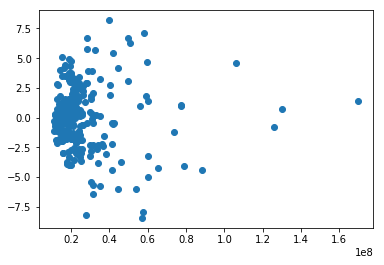

In [75]:
plt.scatter(data['Volume'],data['Profit/Loss'])

### There relation is not taht strong between Volume and Profit/Loss variabel 

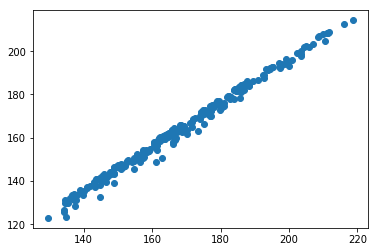

In [78]:
plt.scatter(data['High'],data['Low'])

### The relation between High and Low is very Linear because as both are high linearly dependent on each other

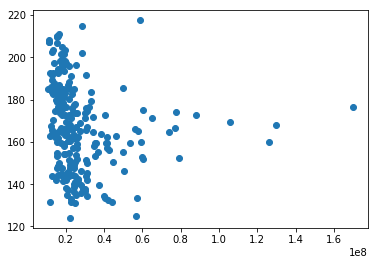

In [81]:
plt.scatter(data['Volume'],data['Adj Close'])

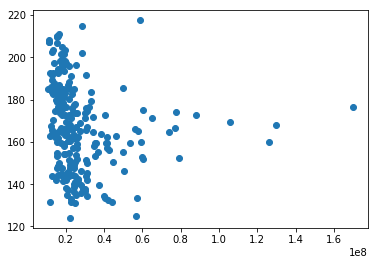

In [97]:
plt.scatter(data['Volume'],data['Close'])

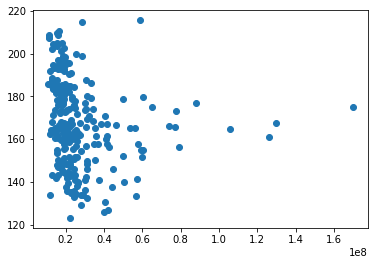

In [99]:
plt.scatter(data['Volume'],data['Open'])

### The plots between rest of the variables is same as of volume and profit/loss as all the variables are dependent on each other 

## Correlation

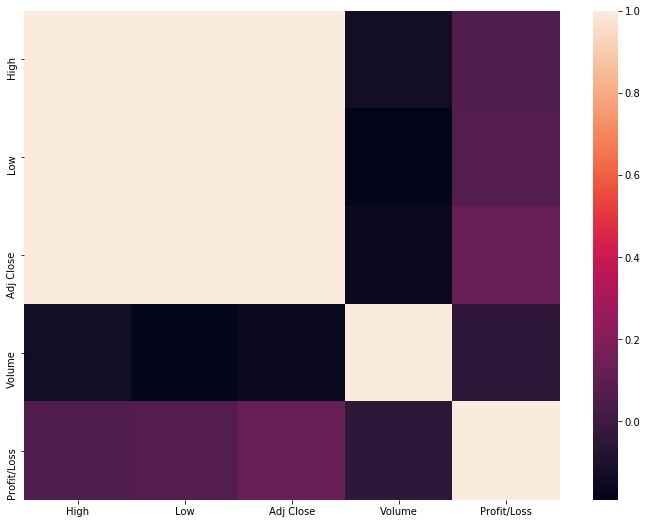

In [125]:
import seaborn as sns
corrmat=data.corr()
f, ax=plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);

### The correlation matrix gives the relationship between the all the variables and we can see all the variables except Volume are strongly correlated with each other as it is a continouse and dependent variables

## Feature Selection


### The dataset considered is Time series analysis dataset when we are building a model for time series all the variables are nedded to be considered as each variable contributes equal lecel of importance in the process of building the model

In [101]:
data=data.drop(columns="Date")

In [100]:
data=data.drop(columns=["Open","Close"])

In [102]:
data.head(3)

,High,Low,Adj Close,Volume,Profit/Loss
0,185.660004,183.220001,184.929993,17599700,0.349991
1,184.699997,181.460007,181.460007,15849800,-2.989990
2,182.880005,178.139999,178.320007,18783000,-3.979996


## Tying to build a Linear Regression model 

### Considering the target and features variables to build the model (independent and dependent)

In [15]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [16]:
Y

array([ 0.349991, -2.98999 , -3.979996, -3.069993,  3.330002,  4.199997,
       -2.      ,  4.970002, -1.220002,  1.319992, -0.470001, -3.729996,
        1.589996,  0.619996,  0.599991, -4.449997,  0.679993,  4.589996,
       -1.240006, -6.050003, -0.760009, -4.089997,  1.380005,  4.639999,
       -2.419999, -0.440002,  3.070007, -2.220002, -0.529999,  0.109986,
        7.11    ,  0.960006, -3.110001, -0.059998, -0.889999,  2.830002,
       -0.520004,  1.900009, -1.509994, -1.430008, -5.739991, -0.449997,
        0.940003, -3.220002, -1.789993,  1.860001,  1.820007, -1.110001,
        3.529999,  0.619995,  0.669998,  2.990006,  2.380005,  2.139999,
       -1.070008, -0.559998, -0.5     ,  1.080002, -0.810012,  0.720001,
       -1.12999 ,  4.399994,  0.049988, -1.100006,  1.400009,  1.130005,
        3.910004,  0.919998,  1.440003, -1.360001,  0.309997, -2.570007,
        1.570007,  2.729995,  0.229996, -0.330001,  3.709992,  0.060013,
        3.509995,  1.25    ,  2.899994, -1.259995, 

### Dividing the traning and the test data for predicting and building the model

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

In [18]:
print(X_train,X_test)

[[1.90970001e+02 1.86770004e+02 1.88179993e+02 2.15032000e+07]
 [1.49830002e+02 1.46539993e+02 1.49009995e+02 2.22372000e+07]
 [1.41770004e+02 1.37770004e+02 1.39529999e+02 3.72506000e+07]
 [1.92720001e+02 1.87479996e+02 1.91779999e+02 3.07826000e+07]
 [1.87860001e+02 1.86199997e+02 1.86639999e+02 1.56467000e+07]
 [1.97070007e+02 1.94639999e+02 1.95850006e+02 2.18609000e+07]
 [2.11619995e+02 2.08800003e+02 2.10910004e+02 1.67320000e+07]
 [1.50679993e+02 1.45990005e+02 1.48949997e+02 2.40690000e+07]
 [1.68339996e+02 1.64500000e+02 1.65039993e+02 1.62923000e+07]
 [1.54649994e+02 1.45600006e+02 1.46039993e+02 2.77446000e+07]
 [1.50190002e+02 1.47440002e+02 1.48679993e+02 1.59712000e+07]
 [2.18619995e+02 2.14270004e+02 2.17500000e+02 5.89542000e+07]
 [1.67250000e+02 1.62809998e+02 1.62929993e+02 4.59948000e+07]
 [1.85300003e+02 1.83130005e+02 1.84490005e+02 1.35329000e+07]
 [1.94550003e+02 1.92070007e+02 1.93990005e+02 1.73072000e+07]
 [1.53009995e+02 1.49830002e+02 1.51529999e+02 2.187740

In [19]:
Y_train

array([-2.570007,  1.529999, -1.540008,  3.910004, -1.070008,  0.060013,
        0.330002,  2.940002, -1.820008, -8.240006, -1.420013,  1.779999,
       -3.710006,  0.720001,  0.919998, -0.040008, -1.430008, -0.189988,
       -2.989991,  5.399994, -1.25    , -1.919998,  1.380005,  1.289993,
       -3.589997, -0.709992, -0.050003,  0.96    ,  1.589996, -2.419999,
       -0.5     , -0.440002, -1.789993, -1.339996,  4.589996,  1.350006,
       -3.729996,  1.520004,  1.279999, -0.14    ,  2.919999, -0.129989,
        2.699997, -0.450012, -2.220002,  1.089996, -0.680008,  2.01001 ,
        0.619995,  0.949997, -3.649994,  2.64    ,  4.399994, -4.449997,
        0.420013, -0.760009,  0.160004, -2.949997, -1.220002,  6.689988,
        0.309998, -3.979996,  3.389999, -2.62001 ,  2.830002,  0.209992,
        0.490005, -1.830002, -2.139999,  0.940003, -3.869995, -0.059998,
        3.990006, -0.520004,  0.199997,  1.080002,  2.429993,  1.820007,
        1.25    , -0.560012,  1.740005, -3.899994, 

### Importing required packages to perform Linear Regression model

In [20]:
from statsmodels.regression import linear_model
from sklearn.linear_model import LinearRegression

### Fitting the traning data in Linear gression 

In [21]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### The intercept 

In [22]:
print(regressor.intercept_)

1.3846292352284704


### The Coefficient

In [23]:
print(regressor.coef_)

[-8.55887866e-01 -6.40635559e-01  1.49074904e+00  1.82007218e-09]


### Predicting the result by applying the model on test data 

In [24]:
y_pred=regressor.predict(X_test)

In [25]:
y_pred

array([-6.76922502, -0.9328341 ,  0.49896906, -1.10577518,  3.28870947,
       -1.42211935,  3.43882718,  1.15021821,  0.37756357,  2.6197435 ,
        1.05704046,  0.53156373,  2.33586987,  0.0796286 ,  2.35457421,
        1.59384497,  3.87761261,  2.47048022, -2.06277542, -0.56891838,
       -0.37412872, -0.81726238,  2.55837288, -0.32537345,  1.4031885 ,
        3.11835232,  3.97357159,  4.38799817,  1.77924664, -1.80858999,
       -0.47828326, -0.73437367, -1.80417391,  2.00530135, -0.35779797,
       -1.97306227,  1.1108331 ,  2.47054514, -0.60210158, -1.5151299 ,
       -3.99892538,  0.21055021,  1.13850107, -0.8938956 ,  0.69360251,
        0.81601322, -2.61878331,  0.09322643, -0.1192453 , -2.56892115,
       -1.93345138])

### Dataframing the Actual and Predected values 

In [130]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

### The Result

In [131]:
df

,Actual,Predicted
0,-8.440002,-6.769225
1,0.319992,-0.932834
2,0.960006,0.498969
3,-1.890000,-1.105775
4,3.940002,3.288709
5,-2.000000,-1.422119
6,4.779999,3.438827
7,2.729995,1.150218
8,-0.400009,0.377564
9,4.199997,2.619744


### Importing few extra packages for computing statistical metrics

In [28]:
from sklearn.metrics import mean_squared_error, r2_score,adjusted_rand_score

from math import sqrt

### RMSE RootMeanSquareErroe

In [45]:
rmse = sqrt(mean_squared_error(Y_test, y_pred))
rmse

1.1479916377388228

### R^2 RSquare

In [30]:
rsqr = r2_score(Y_test,y_pred)
rsqr

0.8522099542753901

## Summary
### The predicted Linear Regression model is 85.20% fit, with a RMSE of 1.14